In [2]:
import pandas as pd
import string, re
from pathlib import Path
from collections import Counter

C:\Users\F0040RP\AppData\Local\Temp\ipykernel_784\3875676619.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
inputdir = Path("../data/resilience/merged")
df = pd.read_csv(Path(inputdir, "merged_wos_files.csv"), encoding = 'utf-8', index_col=[0])
df.head()


,PT,AU,BA,BE,GP,AF,BF,CA,TI,SO,...,WC,WE,SC,GA,PM,OA,HC,HP,DA,UT
0,J,"Jiang, YW; Ritchie, BW; Verreynne, ML",NaN,NaN,NaN,"Jiang, Yawei; Ritchie, Brent W.; Verreynne, Ma...",NaN,NaN,Developing disaster resilience: A processual a...,TOURISM MANAGEMENT,...,"Environmental Studies; Hospitality, Leisure, S...",Social Science Citation Index (SSCI),Environmental Sciences & Ecology; Social Scien...,WQ3JE,NaN,NaN,NaN,NaN,2023-08-03,WOS:000713714900002
1,J,"Nystrom, M; Graham, NAJ; Lokrantz, J; Norstrom...",NaN,NaN,NaN,"Nystrom, M.; Graham, N. A. J.; Lokrantz, J.; N...",NaN,NaN,Capturing the cornerstones of coral reef resil...,CORAL REEFS,...,Marine & Freshwater Biology,Science Citation Index Expanded (SCI-EXPANDED),Marine & Freshwater Biology,368JC,NaN,NaN,NaN,NaN,2023-08-03,WOS:000260616400011
2,J,"Cassidy, S",NaN,NaN,NaN,"Cassidy, Simon",NaN,NaN,The Academic Resilience Scale (ARS-30): A New ...,FRONTIERS IN PSYCHOLOGY,...,"Psychology, Multidisciplinary",Social Science Citation Index (SSCI),Psychology,EC3JI,27917137.0,"Green Published, gold",NaN,NaN,2023-08-03,WOS:000388022000001
3,J,"Adeyeye, K; Emmitt, S",NaN,NaN,NaN,"Adeyeye, Kemi; Emmitt, Stephen",NaN,NaN,"Multi-scale, integrated strategies for urban f...",INTERNATIONAL JOURNAL OF DISASTER RESILIENCE I...,...,Environmental Studies,Emerging Sources Citation Index (ESCI),Environmental Sciences & Ecology,FW7HT,NaN,NaN,NaN,NaN,2023-08-03,WOS:000425493200003
4,J,"Wiig, S; Haraldseid-Driftland, C; Dombestein, ...",NaN,NaN,NaN,"Wiig, Siri; Haraldseid-Driftland, Cecilie; Dom...",NaN,NaN,Backstage researching resilience researchers -...,INTERNATIONAL JOURNAL OF HEALTH GOVERNANCE,...,Health Policy & Services,Emerging Sources Citation Index (ESCI),Health Care Sciences & Services,D3XV6,NaN,hybrid,NaN,NaN,2023-08-03,WOS:000904828800001


In [4]:
df.shape

(3000, 71)

## Split and Explode Web of Science Research Areas column ("SC") from sample dataset

In [5]:
df.loc[:, "SC"] = df.loc[:, "SC"].fillna("")

In [17]:
df['wos_resareas'] = df['SC'].str.split(';')
# remove leading and trailing whitespace to prevent duplication of categories (i.e. "Engineering" vs. " Engineering")
df['wos_resareas'] = df['wos_resareas'].apply(lambda x: [item.strip() for item in x])


In [18]:
df['wos_resareas']

0      [Environmental Sciences & Ecology, Social Scie...
1                          [Marine & Freshwater Biology]
2                                           [Psychology]
3                     [Environmental Sciences & Ecology]
4                      [Health Care Sciences & Services]
                             ...                        
495                                   [Computer Science]
496                               [Business & Economics]
497    [Environmental Sciences & Ecology, Social Scie...
498    [Engineering, Operations Research & Management...
499                                        [Engineering]
Name: wos_resareas, Length: 3000, dtype: object

In [19]:
print(df.shape)
df_sc_explode = df.explode("wos_resareas")
print(df_sc_explode.shape)
df_sc_explode.head()

(3000, 72)
(4901, 72)


,PT,AU,BA,BE,GP,AF,BF,CA,TI,SO,...,WE,SC,GA,PM,OA,HC,HP,DA,UT,wos_resareas
0,J,"Jiang, YW; Ritchie, BW; Verreynne, ML",NaN,NaN,NaN,"Jiang, Yawei; Ritchie, Brent W.; Verreynne, Ma...",NaN,NaN,Developing disaster resilience: A processual a...,TOURISM MANAGEMENT,...,Social Science Citation Index (SSCI),Environmental Sciences & Ecology; Social Scien...,WQ3JE,NaN,NaN,NaN,NaN,2023-08-03,WOS:000713714900002,Environmental Sciences & Ecology
0,J,"Jiang, YW; Ritchie, BW; Verreynne, ML",NaN,NaN,NaN,"Jiang, Yawei; Ritchie, Brent W.; Verreynne, Ma...",NaN,NaN,Developing disaster resilience: A processual a...,TOURISM MANAGEMENT,...,Social Science Citation Index (SSCI),Environmental Sciences & Ecology; Social Scien...,WQ3JE,NaN,NaN,NaN,NaN,2023-08-03,WOS:000713714900002,Social Sciences - Other Topics
0,J,"Jiang, YW; Ritchie, BW; Verreynne, ML",NaN,NaN,NaN,"Jiang, Yawei; Ritchie, Brent W.; Verreynne, Ma...",NaN,NaN,Developing disaster resilience: A processual a...,TOURISM MANAGEMENT,...,Social Science Citation Index (SSCI),Environmental Sciences & Ecology; Social Scien...,WQ3JE,NaN,NaN,NaN,NaN,2023-08-03,WOS:000713714900002,Business & Economics
1,J,"Nystrom, M; Graham, NAJ; Lokrantz, J; Norstrom...",NaN,NaN,NaN,"Nystrom, M.; Graham, N. A. J.; Lokrantz, J.; N...",NaN,NaN,Capturing the cornerstones of coral reef resil...,CORAL REEFS,...,Science Citation Index Expanded (SCI-EXPANDED),Marine & Freshwater Biology,368JC,NaN,NaN,NaN,NaN,2023-08-03,WOS:000260616400011,Marine & Freshwater Biology
2,J,"Cassidy, S",NaN,NaN,NaN,"Cassidy, Simon",NaN,NaN,The Academic Resilience Scale (ARS-30): A New ...,FRONTIERS IN PSYCHOLOGY,...,Social Science Citation Index (SSCI),Psychology,EC3JI,27917137.0,"Green Published, gold",NaN,NaN,2023-08-03,WOS:000388022000001,Psychology


In [20]:
# Notice below: some categories are duplicated due to some leading and trailing whitespace and punctuation
df_sc_explode['wos_resareas'].value_counts()

wos_resareas
Environmental Sciences & Ecology    563
Psychology                          427
Engineering                         404
Business & Economics                352
Psychiatry                          226
                                   ... 
Electrochemistry                      1
Microbiology                          1
Polymer Science                       1
Orthopedics                           1
Mining & Mineral Processing           1
Name: count, Length: 119, dtype: int64

In [21]:
outputdir = Path("../data/resilience/sc")
outputdir.mkdir(parents=True, exist_ok=True)
df_sc_explode['wos_resareas'].value_counts().to_csv(Path(outputdir, "resilience_sc_counts.csv"), encoding="utf-8")


## Examine distribution of Research Areas (SC) for entire dataset

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 24, 16

<Axes: xlabel='Count', ylabel='wos_resareas'>

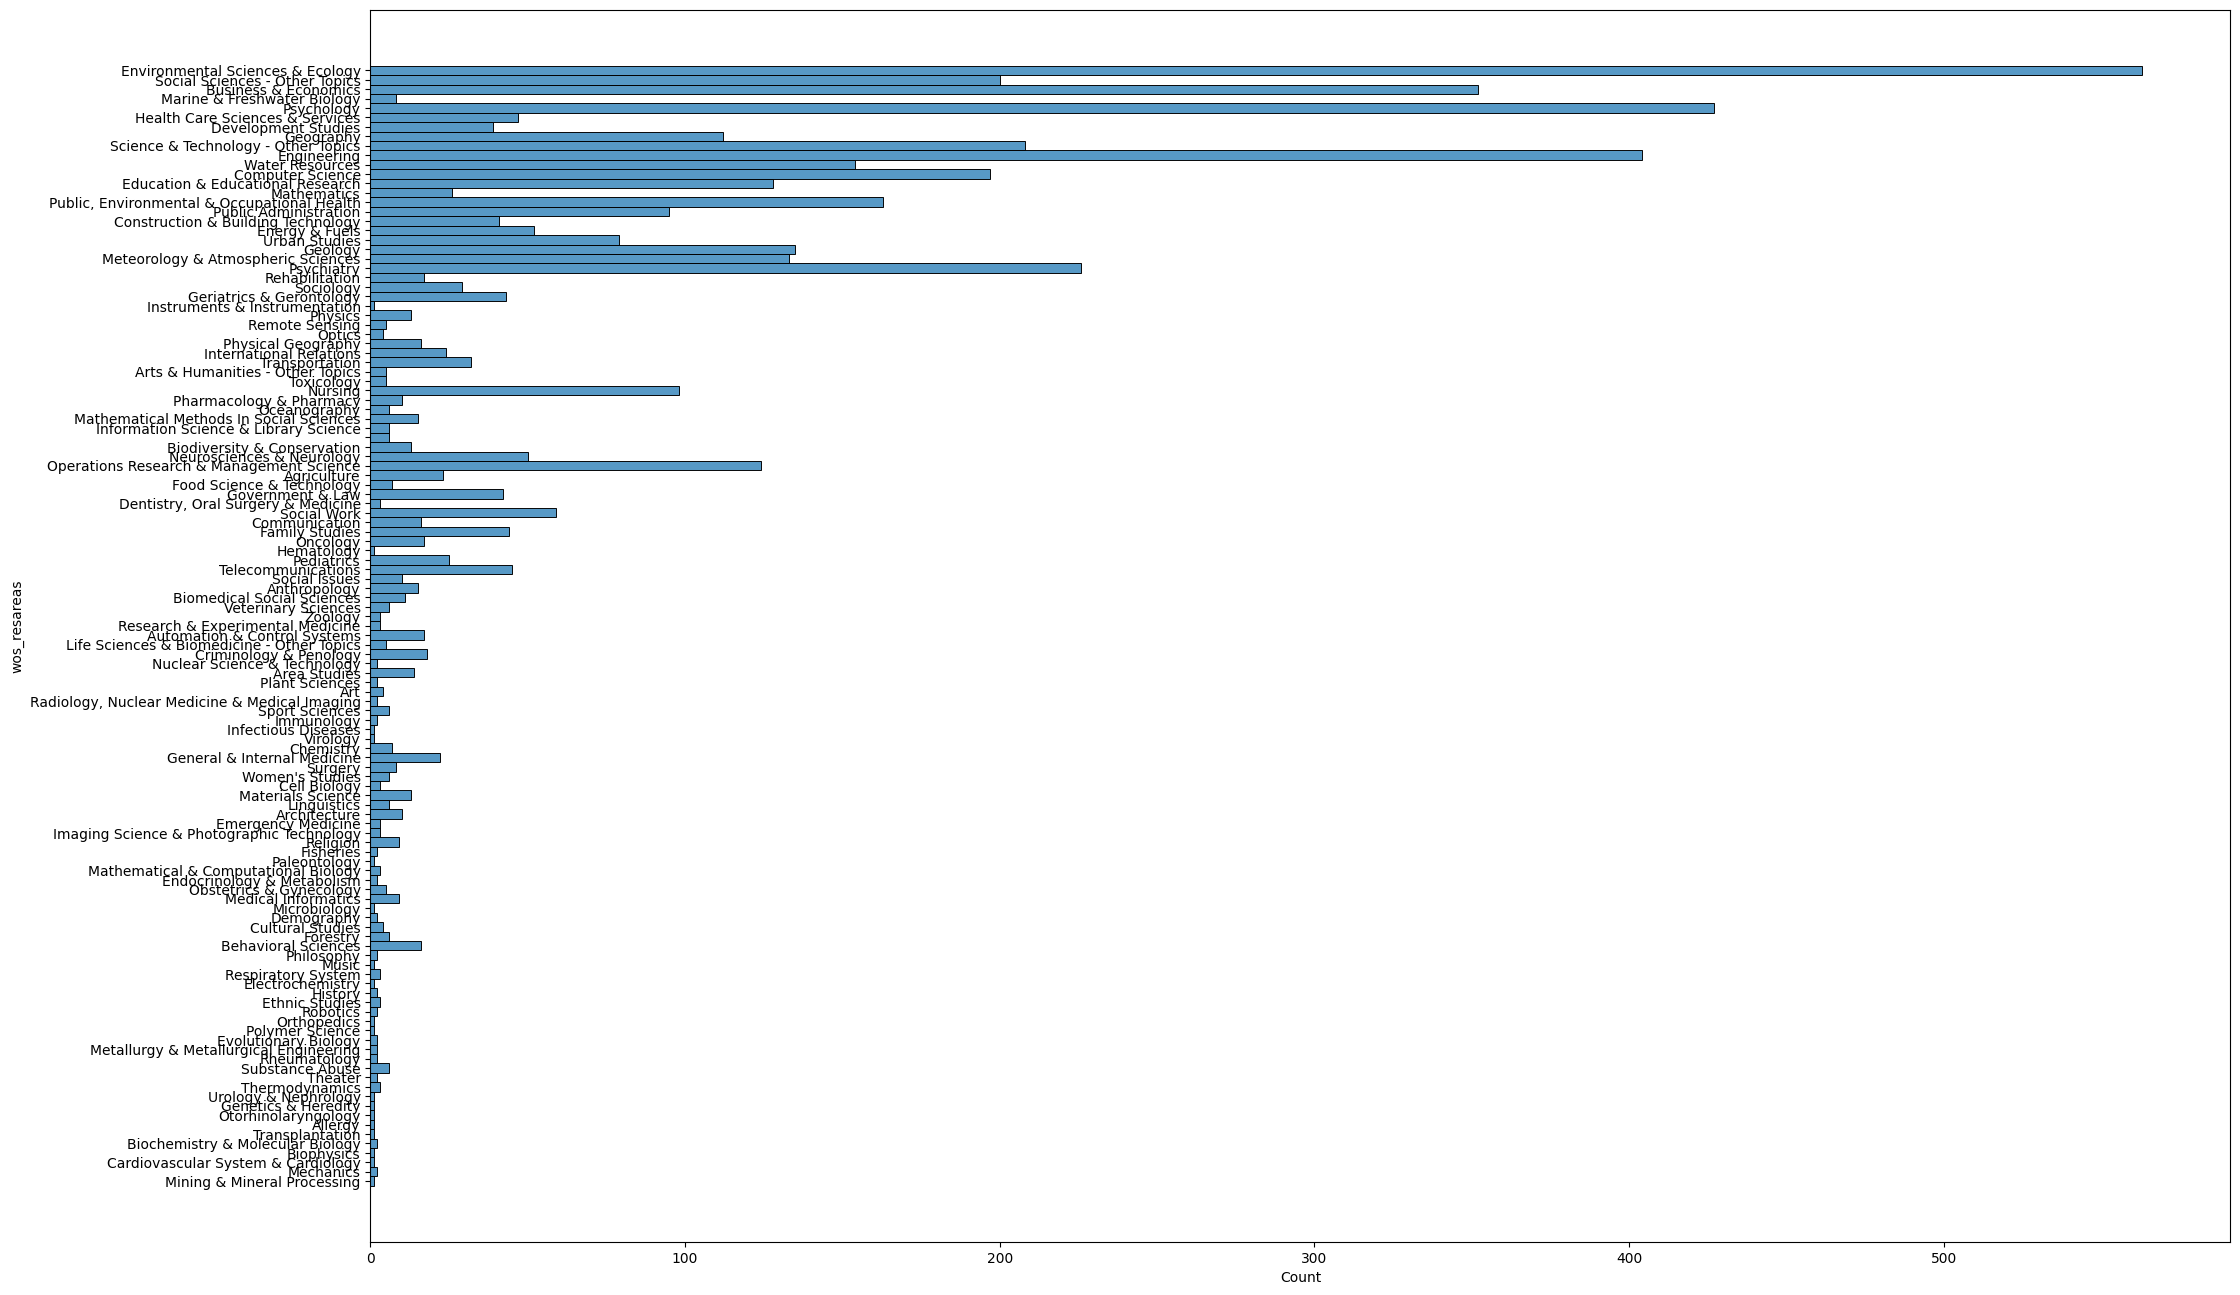

In [27]:
sns.histplot(df_sc_explode, y="wos_resareas")

## Examine distribution of Research Areas across time for entire dataset